In [57]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import mnist

In [58]:
train_image = mnist.train_images()
train_labels = mnist.train_labels()
test_image = mnist.test_images()
test_labels = mnist.test_labels()

In [69]:
train_img = mnist.train_images()
train_lbl = mnist.train_labels()
test_img = mnist.test_images()
test_lbl = mnist.test_labels()

In [70]:
#print(train_img.shape)

In [71]:
train_img = train_img.reshape((-1, 784))

In [72]:
train_img.shape

(60000, 784)

In [73]:
#print(train_lbl.shape)

In [74]:
#print(test_img.shape)

In [75]:
test_img = test_img.reshape((-1,784))

In [76]:
test_img.shape

(10000, 784)

In [77]:
#print(test_lbl.shape)



Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data

Notebook going over the importance of feature Scaling: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(.95)

In [81]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [82]:
pca.n_components_

331

In [83]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [84]:
train_img.shape

(60000, 331)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [39]:
logisticRegr.fit(train_img, train_lbl)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
test_img[0].shape

(331,)

In [41]:
test_img[0].reshape(1,-1).shape

(1, 331)

In [42]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([7], dtype=uint8)

In [43]:
logisticRegr.predict(test_img[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [44]:
train_image[11].shape

(28, 28)

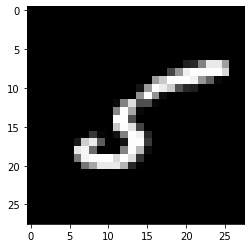

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = train_image[11]
plt.imshow(first_image, cmap='gray')
plt.show()

In [45]:
train_img[11]

array([-4.06225314e+00, -4.24202707e+00,  2.38914686e-01,  3.22073789e+00,
        6.87186696e+00,  8.40266631e-01,  2.10665364e+00, -3.15758057e+00,
       -3.48757094e+00,  3.69066615e+00, -3.89530979e-02,  4.01072997e+00,
       -3.94499737e+00, -2.50982129e-01,  3.05361799e+00, -3.78962397e+00,
        1.85435686e+00,  1.49775283e+00, -1.82343297e+00, -4.41782440e+00,
        1.63135278e+00, -1.78862782e+00, -1.76752259e-01,  3.73510623e-01,
        4.42018169e+00, -3.25126673e+00, -3.10074199e+00,  1.10781182e+00,
        9.43946756e-01,  1.18396187e+00,  2.31695779e+00,  2.05620735e+00,
       -6.04301267e-01,  2.34433978e+00,  2.37203569e+00,  8.22571463e-01,
        4.22796382e+00,  1.19991732e+00, -4.66439029e-01, -1.88405491e-02,
       -8.08233741e-01, -8.48665271e-01, -1.56093209e+00,  1.25044926e-01,
       -2.41803997e+00,  1.70293763e+00, -4.19394589e-01, -9.41015523e-01,
        1.25946472e+00, -1.93129237e+00, -2.69468660e-01,  7.08011750e-01,
       -3.81825024e-01, -

In [51]:
import numpy as np
np.pad(train_img[11], (28, 28), 'constant')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.06225314e+00, -4.24202707e+00,  2.38914686e-01,  3.22073789e+00,
        6.87186696e+00,  8.40266631e-01,  2.10665364e+00, -3.15758057e+00,
       -3.48757094e+00,  3.69066615e+00, -3.89530979e-02,  4.01072997e+00,
       -3.94499737e+00, -2.50982129e-01,  3.05361799e+00, -3.78962397e+00,
        1.85435686e+00,  1.49775283e+00, -1.82343297e+00, -4.41782440e+00,
        1.63135278e+00, -1.78862782e+00, -1.76752259e-01,  3.73510623e-01,
        4.42018169e+00, -

In [45]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9217


In [ ]:
# reference : 
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_to_Speed-up_Machine_Learning_Algorithms.ipynb
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [5]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

In [8]:
y = df.loc[:,['target']].values

In [9]:
x = StandardScaler().fit_transform(x)

In [10]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [11]:
pca = PCA(n_components=2)

In [12]:
principalComponents = pca.fit_transform(x)

In [13]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [15]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [16]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [17]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [73]:
indicesToKeep = finalDf['target'] == target
from collections import Counter
Counter(indicesToKeep)

Counter({False: 100, True: 50})

In [74]:
target

'Iris-virginica'

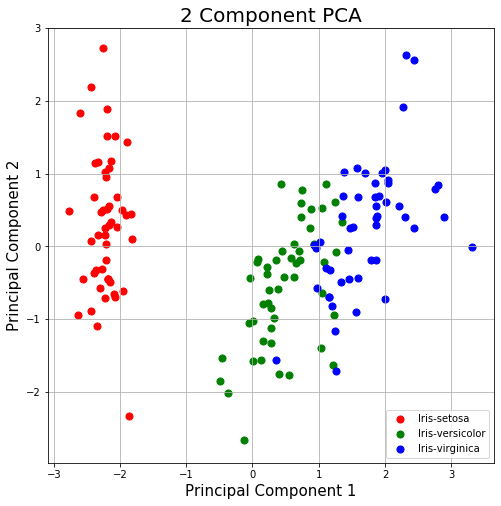

In [67]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()